<a href="https://colab.research.google.com/github/sysiphe0/dacon/blob/master/2001_semicon_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import io

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
train = pd.read_csv('/content/drive/My Drive/train.csv')

In [0]:
test = pd.read_csv('/content/drive/My Drive/test.csv')

In [0]:
train.head()

,layer_1,layer_2,layer_3,layer_4,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,...,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225
0,10,10,10,10,0.254551,0.258823,0.254659,0.252085,0.247678,0.253614,0.246511,0.259407,0.260862,0.242524,0.253870,0.245156,0.245548,0.255501,0.228948,0.228632,0.225802,0.249418,0.246910,0.248747,0.251088,0.244886,0.233906,0.242632,0.221792,0.236521,0.220555,0.243761,0.230202,0.226122,0.220671,0.235075,0.224560,0.226998,0.209499,0.226594,...,0.160126,0.164192,0.171406,0.162364,0.168591,0.166626,0.169696,0.196383,0.194145,0.190646,0.186797,0.191748,0.190886,0.208518,0.211220,0.229286,0.226265,0.226954,0.229023,0.237112,0.262421,0.262566,0.272062,0.292049,0.305353,0.292889,0.317479,0.316911,0.321371,0.355636,0.354750,0.369223,0.388184,0.408496,0.414564,0.429403,0.419225,0.443250,0.433414,0.465502
1,10,10,10,20,0.205062,0.225544,0.217758,0.202169,0.199633,0.207380,0.191318,0.195369,0.200536,0.197588,0.198726,0.191803,0.199625,0.206465,0.182836,0.193341,0.180459,0.196416,0.185398,0.188913,0.176011,0.173457,0.182249,0.176816,0.192716,0.185924,0.183816,0.186900,0.161040,0.173525,0.172948,0.182634,0.161153,0.158073,0.152335,0.148293,...,0.327076,0.331195,0.337722,0.340189,0.342748,0.351925,0.372989,0.389663,0.396216,0.384977,0.383701,0.403894,0.406382,0.429342,0.409908,0.439307,0.432569,0.439114,0.459541,0.454988,0.475268,0.478575,0.483466,0.496912,0.499542,0.522705,0.524767,0.533952,0.558729,0.572470,0.557203,0.573656,0.587998,0.612754,0.627825,0.633393,0.637706,0.625981,0.653231,0.637853
2,10,10,10,30,0.189196,0.165869,0.177655,0.156822,0.175094,0.177755,0.157582,0.158885,0.156911,0.166162,0.148831,0.144950,0.151362,0.145110,0.159201,0.139296,0.145313,0.156555,0.145363,0.150352,0.150542,0.142990,0.139572,0.145669,0.144514,0.126263,0.112832,0.117535,0.111473,0.117545,0.107058,0.119299,0.110768,0.124217,0.124496,0.110023,...,0.525450,0.532645,0.539097,0.527091,0.531925,0.530325,0.551716,0.556125,0.567470,0.549711,0.566789,0.574313,0.569873,0.574390,0.601672,0.584206,0.602981,0.598708,0.615189,0.637023,0.626458,0.645439,0.629203,0.640967,0.652762,0.660495,0.676498,0.674599,0.693535,0.699182,0.699864,0.708688,0.721982,0.713464,0.743030,0.741709,0.747743,0.746037,0.737356,0.750391
3,10,10,10,40,0.131003,0.120076,0.138975,0.117931,0.130566,0.131262,0.126962,0.134453,0.106717,0.127309,0.099958,0.112908,0.106853,0.108288,0.101393,0.094074,0.086854,0.099669,0.107276,0.091117,0.084525,0.078293,0.076476,0.078559,0.072960,0.075898,0.067963,0.066055,0.087904,0.065373,0.075469,0.080097,0.068895,0.058148,0.057882,0.063258,...,0.616934,0.638654,0.630914,0.647135,0.629796,0.644114,0.641825,0.645360,0.653030,0.656335,0.657734,0.678019,0.676713,0.681540,0.673333,0.686743,0.697500,0.702650,0.693750,0.711013,0.714411,0.701010,0.726972,0.719394,0.726329,0.730821,0.740062,0.747356,0.749405,0.766173,0.764786,0.763788,0.770017,0.787571,0.778866,0.776969,0.774712,0.801526,0.805305,0.784057
4,10,10,10,50,0.091033,0.086893,0.108125,0.080405,0.105917,0.077083,0.097895,0.086765,0.078676,0.075729,0.086023,0.070649,0.078957,0.072772,0.069867,0.080523,0.068273,0.074660,0.069852,0.047442,0.067855,0.049580,0.068737,0.041386,0.048697,0.040278,0.050234,0.059371,0.042581,0.037117,0.041503,0.055113,0.034001,0.035846,0.030385,0.048935,...,0.670888,0.692846,0.673025,0.704448,0.696657,0.697524,0.692513,0.714224,0.696880,0.716361,0.723607,0.720018,0.715039,0.705079,0.720913,0.723440,0.719858,0.729948,0.731360,0.728861,0.740501,0.738362,0.749341,0.738456,0.768791,0.770292,0.766630,0.779970,0.787695,0.766521,0.786677,0.802271,0.806557,0.799614,0.789333,0.804087,0.787763,0.794948,0.819105,0.801781


In [0]:
#@title 기본 제목 텍스트
#독립변수와 종속변수를 분리합니다.
from sklearn.model_selection import train_test_split
x_train = train.iloc[:,4:]  #Train 데이터의 독립변수
y_train = train.iloc[:,0:4] #Train 데이터의 종속변수
#x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0)

In [0]:
x_test = test.iloc[:,1:]    #Test  데이터의 독립변수

In [7]:
#케라스를 통해 모델 생성을 시작합니다.
import keras
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()

Using TensorFlow backend.


In [8]:
model.add(Dense(units=160, activation='relu', input_dim=226))
model.add(Dense(units=160, activation='relu'))
model.add(Dense(units=160, activation='relu'))
model.add(Dense(units=160, activation='relu'))
model.add(Dense(units=160, activation='relu'))
model.add(Dense(units=160, activation='relu'))
model.add(Dense(units=160, activation='relu'))
model.add(Dense(units=4, activation='linear'))

In [9]:
#모델을 컴파일합니다.
model.compile(loss='mae', optimizer='adam', metrics=['mae'])




Train on 769500 samples, validate on 40500 samples
Epoch 1/30





769500/769500 [==============================] - 374s 486us/step - loss: 45.9820 - mean_absolute_error: 45.9820 - val_loss: 49.6062 - val_mean_absolute_error: 49.6062
Epoch 2/30
769500/769500 [==============================] - 371s 482us/step - loss: 28.4029 - mean_absolute_error: 28.4029 - val_loss: 42.3101 - val_mean_absolute_error: 42.3101
Epoch 3/30
769500/769500 [==============================] - 367s 477us/step - loss: 22.8291 - mean_absolute_error: 22.8291 - val_loss: 37.3581 - val_mean_absolute_error: 37.3581
Epoch 4/30
769500/769500 [==============================] - 362s 470us/step - loss: 19.8231 - mean_absolute_error: 19.8231 - val_loss: 38.7956 - val_mean_absolute_error: 38.7956
Epoch 5/30
769500/769500 [==============================] - 361s 469us/step - loss: 17.9561 - mean_absolute_error: 17.9561 - val_loss: 34.9230 - val_mean_absolute_error: 34.9230
Epoch 6/30
769500/769500 [=========================

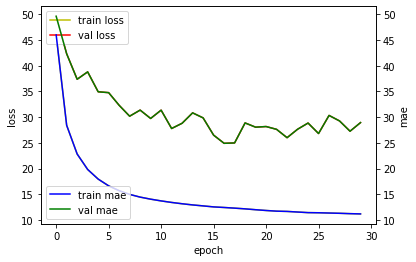

In [10]:
#모델을 학습합니다.
hist = model.fit(x_train, y_train, epochs=30, batch_size=10, validation_split = 0.05)

%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

mae_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

mae_ax.plot(hist.history['mean_absolute_error'], 'b', label='train mae')
mae_ax.plot(hist.history['val_mean_absolute_error'], 'g', label='val mae')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
mae_ax.set_ylabel('mae')

loss_ax.legend(loc='upper left')
mae_ax.legend(loc='lower left')

plt.show()

#예측값을 생성합니다.
pred_test = model.predict(x_test)
#submission 파일을 생성합니다.
sample_sub = pd.read_csv('/content/drive/My Drive/sample_submission.csv', index_col=0)
submission = sample_sub+pred_test
submission.to_csv('submission_200201.csv')